In [136]:
import pandas as pd
import bs4
import requests
import json
import matplotlib.pyplot as plt

In [137]:
df = pd.read_csv('C:\INTRO TO DATASCIENCE(CB)\IMDB-Movie-Dataset-Analysis-master\imdb-movies.csv')
df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,06-09-2015,5562,6.5,2015,137999939.3,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,137999939.3,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,101199955.5,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,183999919.0,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,04-01-2015,2947,7.3,2015,174799923.1,1.385749e+09


In [138]:
def get_id(num):
    data =  pd.read_csv('C:\INTRO TO DATASCIENCE(CB)\IMDB-Movie-Dataset-Analysis-master\imdb-movies.csv')
    start = 0
    end = start + num
    movies = list(data['imdb_id'])
    return movies[start:end]



In [139]:
def scrape_movie(movie_id):
    url = r'https://www.imdb.com/title/{}/'.format(str(movie_id))
    res = requests.get(url)
    data = bs4.BeautifulSoup(res.text,'html.parser')
    x = data.find('script', attrs={'type':'application/ld+json'})
    x = str(x)[str(x).find('{'):-9]
    return x


In [140]:
def collect_movie_data(movie_id):
    movie_data = scrape_movie(movie_id)
    movie_data = json.loads(movie_data)
    movie = {
        'Moviename':movie_data['name'],
        'genre': movie_data['genre'],
        'rating': movie_data['aggregateRating']['ratingValue']
    }
    return movie

In [149]:
ids = get_id(5)
ls = []
rating = []
for i in ids:
    x = (collect_movie_data(i))
    ls.append(x['Moviename'])
    rating.append(x['rating'])

In [157]:
df1 = pd.DataFrame({'name': ls, 'rating':rating})
df1

,name,rating
0,Jurassic World,7.0
1,Mad Max: Fury Road,8.1
2,Insurgent,6.2
3,Star Wars: Episode VII - The Force Awakens,7.9
4,Fast &amp; Furious 7,7.1


<BarContainer object of 5 artists>

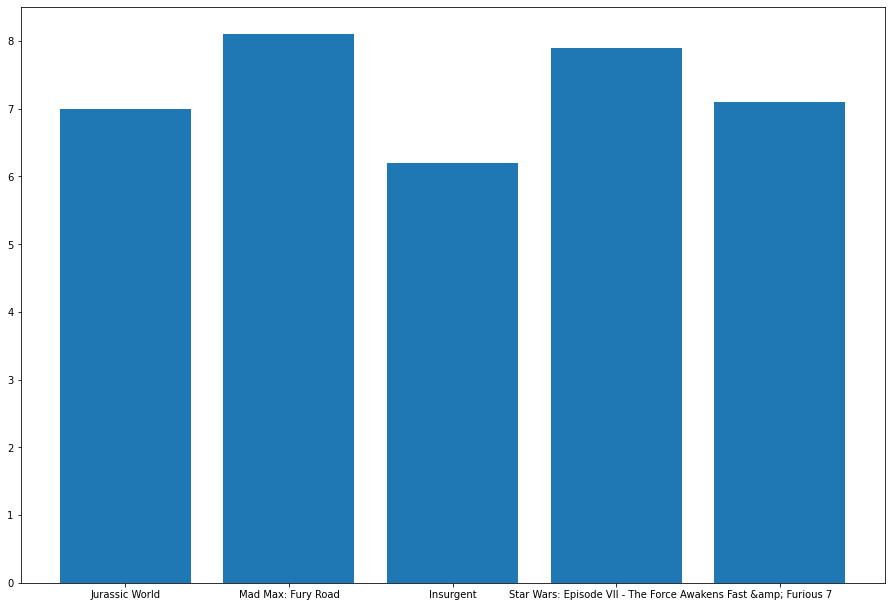

In [151]:
fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.bar(ls,rating)